In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
#Loading the csv data to a Pandas DataFrame
hpt_data = pd.read_csv('hypertension_dataset.csv')

#Printing the last 5 rows of the dataset
hpt_data.tail()

#Print first 5 rows of the dataset
hpt_data.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


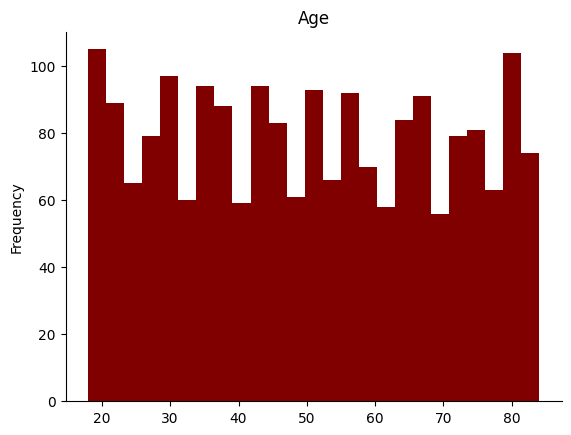

In [8]:
from matplotlib import pyplot as plt
hpt_data['Age'].plot(kind='hist', bins=25, title='Age',color='maroon')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
#Shape of the dataset
hpt_data.shape

#Info about the data
hpt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB


In [28]:
hpt_data['Has_Hypertension'] = hpt_data['Has_Hypertension'].replace("Yes", 1)
hpt_data['Has_Hypertension'] = hpt_data['Has_Hypertension'].replace("No", 0)

In [53]:
#Feature Selection
X = hpt_data.drop(columns='Has_Hypertension', axis=1)
Y = hpt_data['Has_Hypertension']

#Identifying categorical columns
categorical_cols = X.select_dtypes(include='object').columns

# One-hot encoding to
X = pd.get_dummies(X, columns=categorical_cols, dummy_na=False)

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [45]:
print(X.shape,X_train.shape,X_test.shape)

(1985, 19) (1588, 19) (397, 19)


In [46]:
model = LogisticRegression()

In [47]:
#Training the Logistic Regression model with the training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
#Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [50]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8816120906801007


In [51]:
#Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [52]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8740554156171285


In [56]:
input_data = (65,74,38,24,160,27,3,4,7,23,45,88,32,11,14,92,48,0,65)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [57]:
if prediction[0] == 0:
    print('The person does not have hypertension')
else:
    print('The person has hypertension')

The person does not have hypertension
